# Self Oil Station Price Analysis

## Selenium 맛보기

In [1]:
# !pip install selenium
# !pip list
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../driver/chromedriver.exe')

In [3]:
driver.get('https://www.naver.com')

아래처럼 자동화된 테스트 소프트웨어에 의해 제어되고 있다고 뜬다!

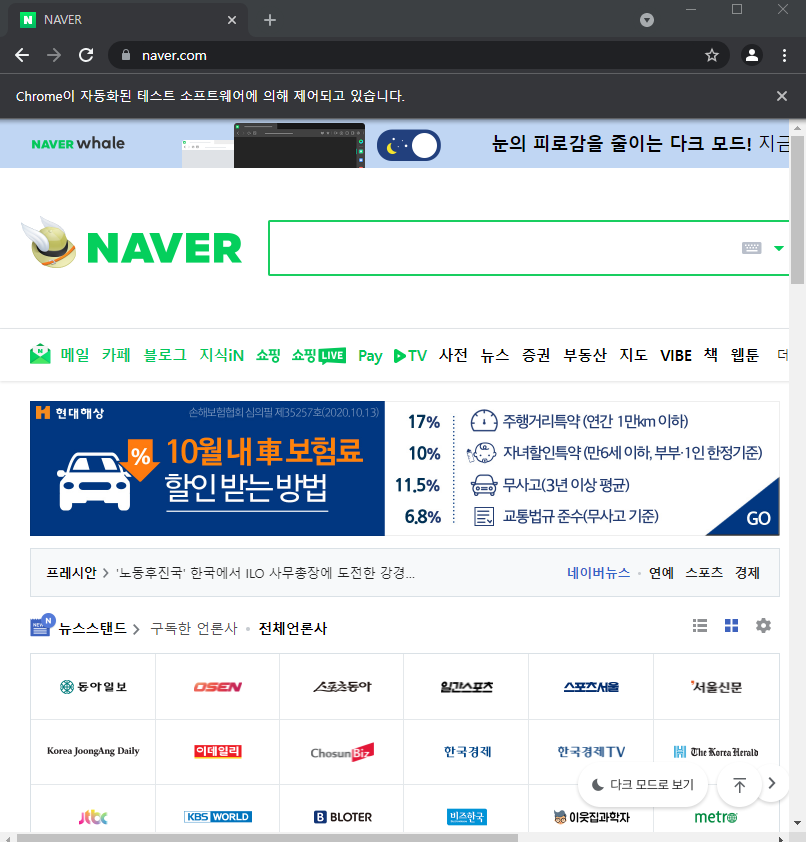

반드시 켠 이후에는 quit()으로 종료해야한다!

In [4]:
driver.quit()

### 셀레니움을 쓰는 이유?
화면이 바뀌어도, 주소가 바뀌지 않는 경우, 주소로 모든 값이나 사이트에 접속할 수가 없다.

그렇다면 BeautifulSoup으로는 완벽히 조작하기 어렵다.

그래서 직접 사이트를 조작할 수 있는 셀레니움을 사용해야한다

## 2. 셀프 주유소가 정말 저렴한가요?
- 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do

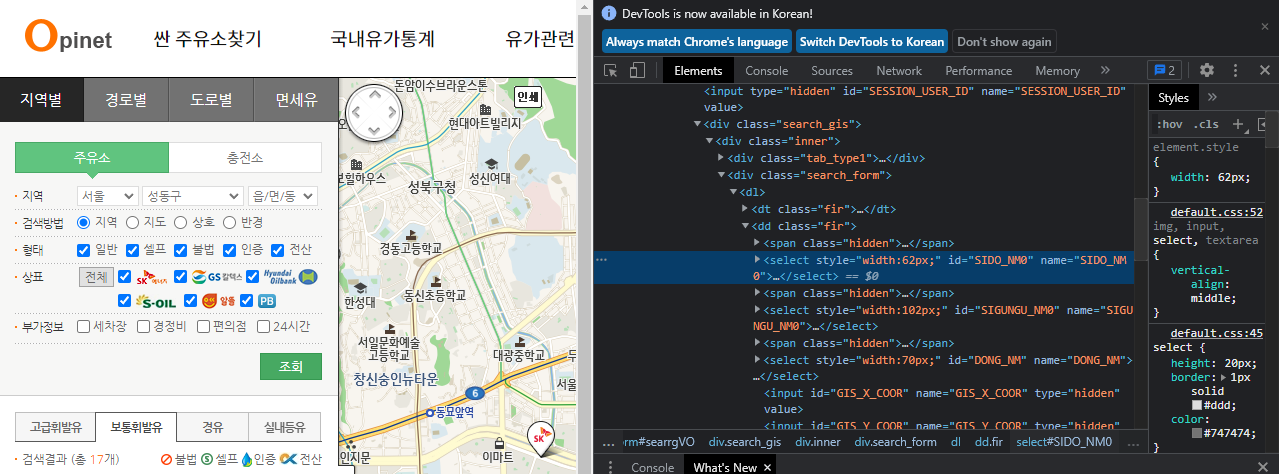

- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. Selenium을 통해 접근

문제 > 해결
- 메인 페이지로 접속이 되고, 팝업창이 뜬다 > 닫아준다.
- 해당 URL로 한번에 접근 불가 > 접속 후 재요청 한다.
- 페이지가 로딩이 되기 전에 이동하려한다 > time으로 인간적인 텀을 준다.

In [5]:
from selenium import webdriver
import time
# 페이지가 로딩이 된 이후 클릭이나 이동을 해야하기 때문에, time을 통해 텀을 준다
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('../driver/chromedriver.exe')
def main_get():
    # 페이지 접근
    driver.get(url)
    time.sleep(3)
    # 팝업창 화면 전환 후 닫아주기
    driver.switch_to_window(driver.window_handles[-1])
    driver.close()
    time.sleep(3)
    # 메인화면 창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    # 접근 URL 재요청
    driver.get(url)

In [6]:
main_get()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15808/2658287232.py:11: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15808/2658287232.py:15: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


접속 완료!

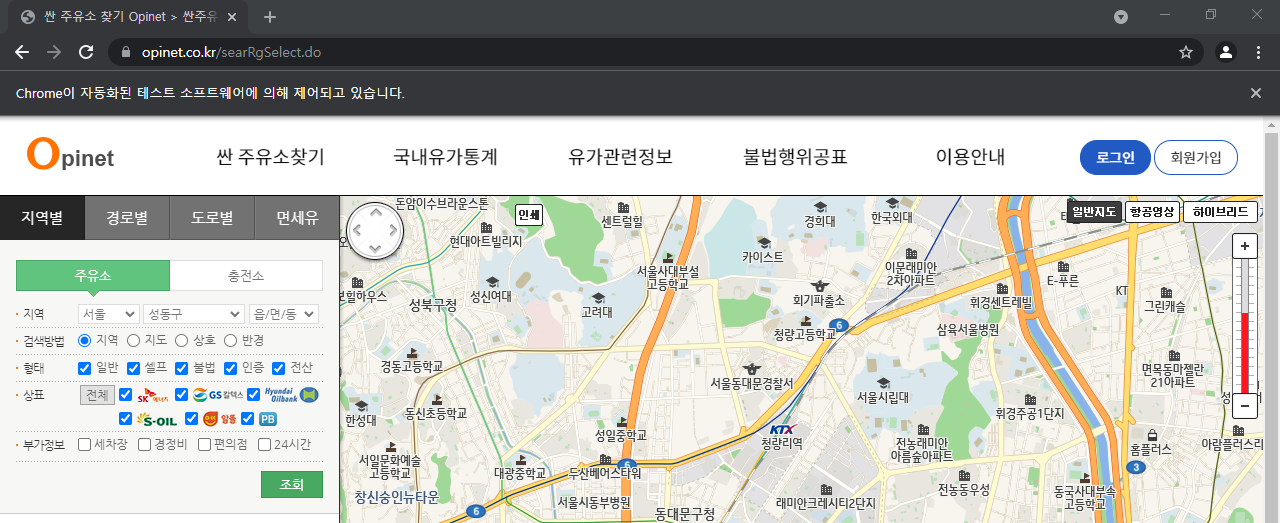

##### 서울시에서 구를 바꿔가면서 데이터를 불러와보자
우선 서울시로 변경해야하니까...

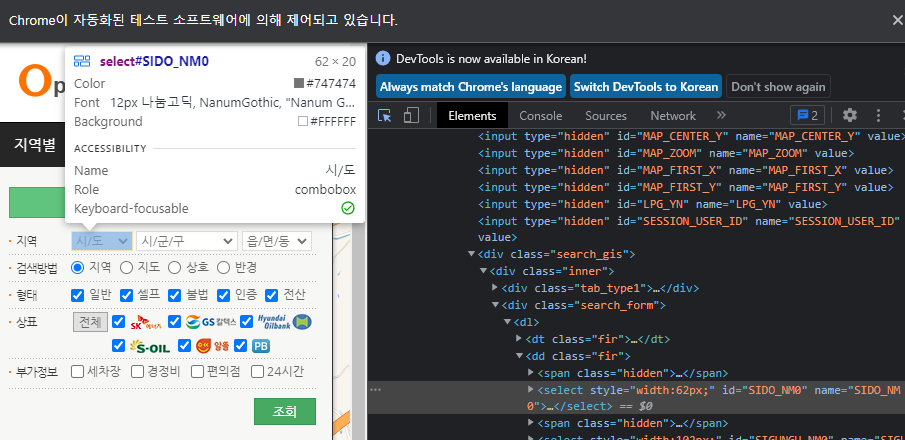

크롬 개발자 도구를 이용해서 해당 태그의 id가 "SIDO_NM0"임을 알았다!

In [7]:
# 지역: 시/도
sido_list_raw = driver.find_element_by_id('SIDO_NM0')
sido_list_raw.send_keys('서울특별시')

그 다음에는 모든 구를 돌아가면서 해당 엑셀파일을 다운받아야하는데,

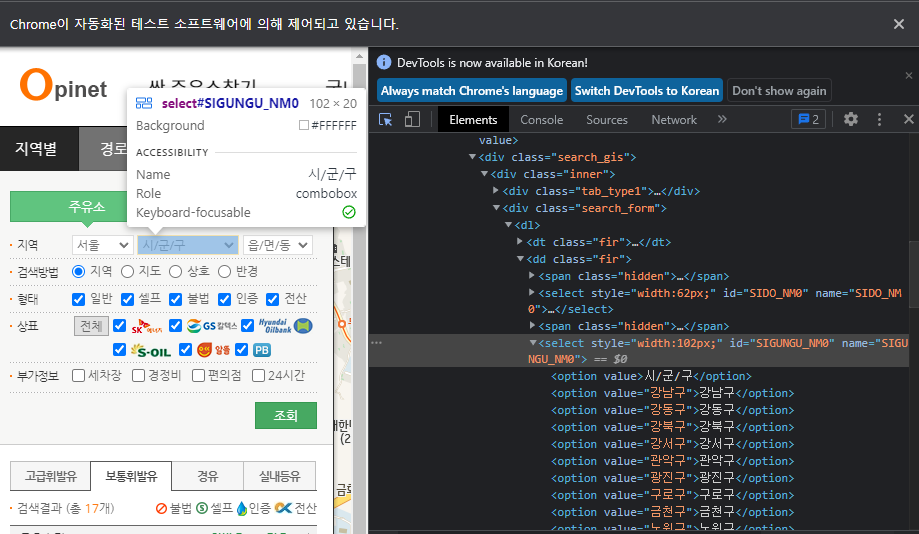

해당 태그의 id가 'SIGUNGU_NM0'인 것과 그 하위에 구의 이름들이 있다는 것을 알았다!
for문으로 구현해보자!

In [8]:
gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0')
# element's'가 해당 태그네임을 지니는 요소를 여러개 가져오도록 해준다.
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names = gu_names[1:]
print(gu_names)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


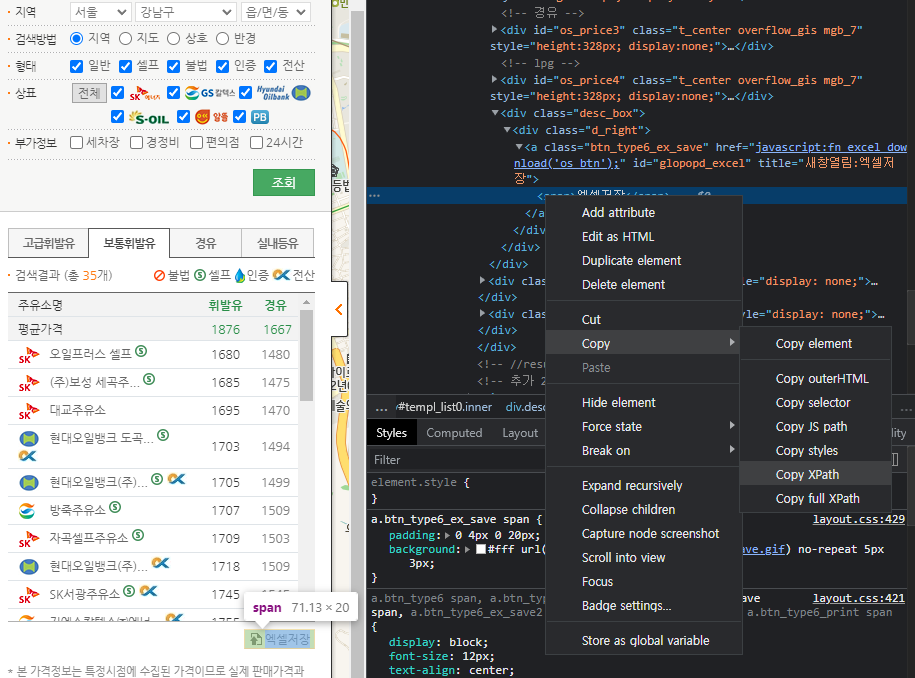

In [9]:
import time
from tqdm import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span')
    element_get_excel.click()
    # element_get_excel = driver.find_element_by_css_selector('#glopopd_excel > span')
    time.sleep(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:00<00:00,  7.24s/it]


## 데이터 정리하기

In [10]:
import pandas as pd
!pip install glob
from glob import glob

In [15]:
# 파일 목록 한 번에 가져오기
glob('../data/지역_*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [16]:
# 파일 명 저장
stations_files = glob('../data/지역_*.xls')
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [17]:
# 하나만 읽어보기
# 2번째 row까지는 데이터가 없기stations_filesader=2로 3번째줄부터 읽는다는 사실을 알려주어야한다.
tmp = pd.read_excel(stations_files[0], header = 2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
14,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1868,1668,-
15,서울특별시,강동주유소,서울 강동구 양재대로 1509 (길동),SK에너지,02-477-5101,N,2448,2178,1957,-


##### 형식이 동일하고 연달아 붙이기만 하면 될 때는 pd.concat

In [20]:
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
stations_raw = pd.concat(tmp_raw)
stations_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
33,서울특별시,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2317,2158,1918,-
34,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2495,2275,1995,-
35,서울특별시,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),GS칼텍스,02-3411-3271,N,-,-,-,-
36,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-
37,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [19]:
# DataFrame 살피기
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [22]:
stations = pd.DataFrame({
    '상호': stations_raw['상호'],
    '주소': stations_raw['주소'],
    '가격': stations_raw['휘발유'],
    '셀프': stations_raw['셀프여부'],
    '상표': stations_raw['상표'],
})
stations.tail()

,상호,주소,가격,셀프,상표
33,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158,N,GS칼텍스
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지


In [ ]:
for eachAddress in stations['주소']